In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Una vez en la noche,1971
1,Assassins et voleurs,1957
2,Navy Wife,1935
3,The Boys Behind the Desk,2000
4,Grand Festival,2006


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [23]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c.fillna("0")
#d = c.Batman - c.Superman
d= c.Superman - c.Batman
#d.head()
len(d[d > 0.0])
#c.head()

3

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [24]:
print(len(d[d < 0.0]))

7


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

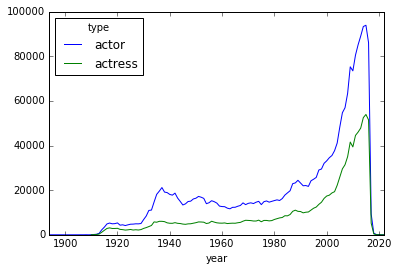

In [27]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
#c
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

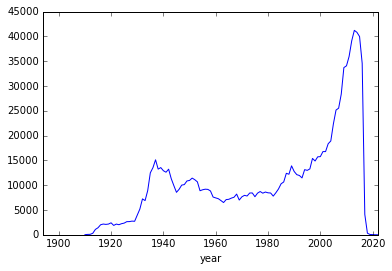

In [28]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

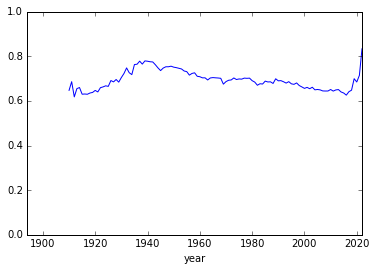

In [30]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

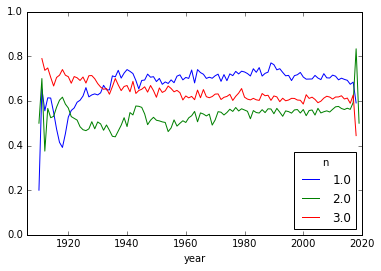

In [29]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])